# matplotlib и другие графические библиотеки

## matplotlib

Библиотека [matplotlib](https://matplotlib.org/) --- основная библиотека для визуализации данных и построения графиков в python. 

Как и `NumPy`, `matplotlib` входит в дистрибутив `Anaconda`, но требует дополнительной установки в общем случае.

```sh
pip install matplotlib
```

Построение графиков в `matplotlib` осуществляется довольно просто: чтобы построить самый простой график, достаточно нескольких строк кода. 

(first-graph)=

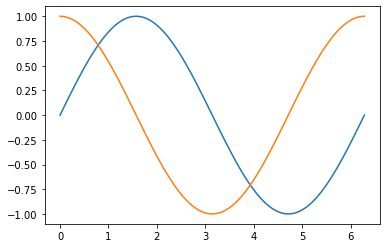

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Генерация данных
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Построение графика
plt.plot(x, y1, x, y2)
plt.show()

Обычно из `matplotlib` импортируют подмодуль `pyplot`, который предназначен для построения `2D` графиков. Как и в случае с `NumPy`, есть общепринятое сокращение для `pyplot` --- `plt`. Т.е. если `matplotlib` импортируют для построения графиков в двух осях, то обычно это делается так
```python
from matplotlib import pyplot as plt
```
или так
```python
import matplotlib.pyplot as plt
```

## Figure и axes


Построение графиков в `matplotlib` осуществляется внутри объектов `figure`. `matplotlib` очень гибкий инструмент и эта `figure` в стандартном случае создаёт окно с графическим интерфейсом, но может быть встроена в `jupyter notebook` или в пользовательские приложения с графическим интерфейсом без больших усилий.

Сами графики строятся в осях `Axes`, при этом в одной фигуре может быть несколько `Axes`. Рассмотрим это на примере функции [plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).


### 1 figure - 1 axes

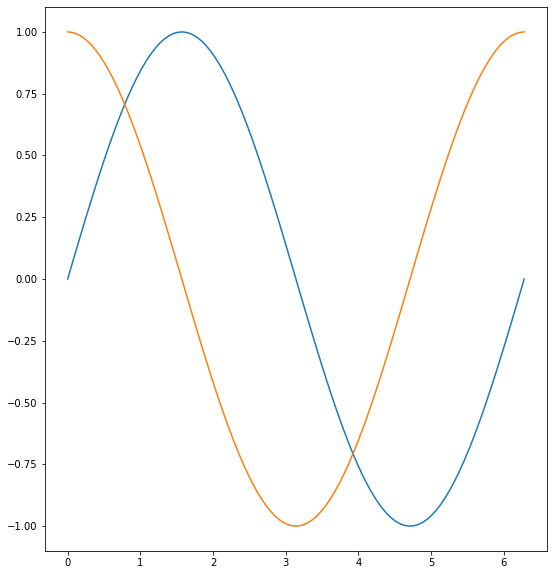

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Генерация данных
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Построение графика
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(9)
ax.plot(x, y1, x, y2)
plt.show()

Разберем по блокам ячейку выше.

```python
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
```

Кроме стандартных импортов встречается выражение `%matplotlib inline`, которое, как и `%time` и `%%timeit`, не является частью языка `python`, а перехватывается `jupyter notebook`. Это выражение говорит `jupyter` встраивать фигуры `matplotlib` прямиком в `jupyter notebook`. Достойным аналогом ей является `%matplotlib notebook`.


В следующем блоке команд осуществляется генерация данных, для построения графика и тут нет ничего необычного. 

```python
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
```


Следующая строка создаёт фигуру с одними осями на ней:
```python
fig, ax = plt.subplots()
```
Функция `plt.subplots()` возвращает два значения:
1.  созданную фигуру; 
2.  оси, привязанные к этой фигуре. В данном случае таких осей всего одна штука.

Связываем созданную фигуру с именем `fig`, а созданные оси с именем `ax`.

Далее задаются размеры фигуры командами
```python
fig.set_figheight(10)
fig.set_figwidth(9)
```
Размеры итоговой картинки выходят крупнее, что можно отследить, сравнив этот пример с [самым первым графиком](first-graph). Вообще говоря, размеры фигуры можно было задать при создании фигуры по ключевому слову `figsize`. Т.е. последние 3 рассмотренные строки можно заменить на
```python
fig, ax = plt.subplots(figsize=(10, 9))
```

Далее строятся графики на единственных осях созданной фигуры. В самом первом примере график был построен командой `plt.plot`, которая сама создала фигуру с осями на ней и построила на ней график по массивам значений `x` и `y`. Здесь мы вызвали метод `plot` у уже созданных осей. Преимущество такого подхода проявляется тогда, когда осей на фигуре больше одних. 


### 1 figure - N axes

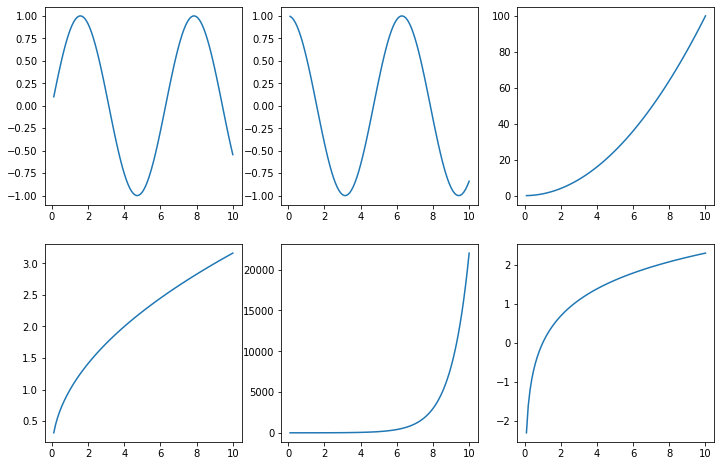

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# данные для графиков
x = np.linspace(0.1, 10, 100)
funcs = [[np.sin, np.cos, np.square], [np.sqrt, np.exp, np.log]]

# Построение графиков
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        f = funcs[i][j]
        axs[i, j].plot(x, f(x))
plt.show()


В данном примере создаётся одна фигура, к которой привязано сразу 6 осей (`Axes`), т.е. 6 разных графиков. Расположение осей внутри графика может быть разным, но самый простой --- с помощью той же самой функции `plt.subplots`, которая располагает их в ячейках "таблицы" из `nrows` строк и `ncols` столбцов. Расположим эти графики по 3 столбцам и 2 строкам. 

```python
# данные для графиков
x = np.linspace(0.1, 10, 100)
funcs = [[np.sin, np.cos, np.square], [np.sqrt, np.exp, np.log]]
```

Здесь задаётся массив значений `x`, который будет общий для всех графиков, и список  функций `funcs`, графики которых будут строиться. Забегая вперед, если строк и столбцов несколько, то `plt.subplots` возвращает массив `NumPy`, элементами которого являются `Axes`. Чтобы удобнее было пробегать по этому списку функций в цикле он заранее создан в виде списка списков.

```python
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
```
Используя ту же самую функцию `plt.subplots` создаётся одна (!) фигура (`Figure`) и 6 осей (`Axes`). Чтобы осей создалось несколько передаём функции количество строк и столбцов. На выходе получаем объект фигуры `fig` и массив осей `axes` на этой фигуре. Далее в цикле пробегаемся по осям и строим на них график соответствующей функции из списка `funcs`. 

```python
for i in range(2):
    for j in range(3):
        f = funcs[i][j]
        axs[i, j].plot(x, f(x))
```
Здесь код метод `plot` вызывается у `axs[i, j]` --- осей в `i`-й строке и `j`-м столбце фигуры.  


## Настройка деталей

Все примеры выше просто строили графики с параметрами по умолчанию. Почти все в `matplotlib` поддаётся модификации.

![image](/_static/lecture_specific/matplotlib/anatomy.png)

Ниже приведен кусок кода, демонстрирующий настройку самых основных параметров графика.

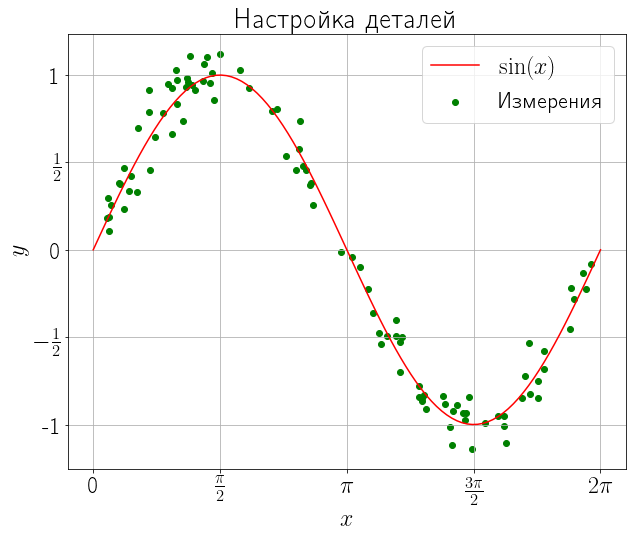

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=24)
plt.rcParams['text.latex.preamble'] = r"""
\usepackage[utf8]{inputenc}
\usepackage[english,russian]{babel}
\usepackage{amsmath}
"""


x1 = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x1)
x2 = np.random.uniform(low=0, high=2*np.pi, size=100)
y2 = np.sin(x2) + np.random.normal(loc=0, scale=0.1, size=100)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x1, y1, color="red")
ax.scatter(x2, y2, marker="o", color="green")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("Настройка деталей", fontdict={"size": "30"})
ax.legend(["$\sin(x)$", "Измерения"], )
ax.xaxis.set_ticks(np.linspace(0, 2*np.pi, 5))
ax.xaxis.set_ticklabels(["0", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"])
ax.yaxis.set_ticks(np.linspace(-1, 1, 5))
ax.yaxis.set_ticklabels(["-1", r"$-\frac{1}{2}$", "0", r"$\frac{1}{2}$", "1"])
ax.grid()

```{warning}
Этот пример требует установленного $\LaTeX$ на вашем компьютере.
```




## Другие графические библиотеки

```{warning}
Все нижеприведенные библиотеки не входят в дистрибутив `Anaconda` и требуют дополнительной установки. 
```

### seaborn

[seaborn](https://seaborn.pydata.org/) другая библиотека для построенная графиков нацеленная прежде всего на задачи статистики, анализа данных, машинного обучения и прочего. Основными её преимуществами являются:
- является расширением `matplotlib`, т.е. можно совмещать;
- графики `seaborn` не требуют долгой настройки, часто выглядят достаточно хорошо сразу же;
- хорошая совместимость с библиотекой `pandas`.

```{note}
Так же достойны упоминания [vega/altair](https://altair-viz.github.io/).
```
 

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

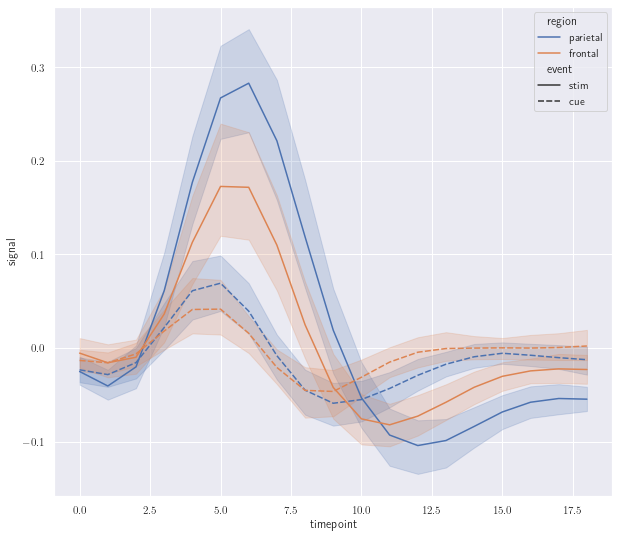

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt


sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
fig = plt.figure(figsize=(10, 9))
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


### plotly

Основным преимуществом [plotly](https://plotly.com/python/) является построение графиков, с которыми можно интерактивно взаимодействовать. 

```python
import plotly.express as px

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="sepal_length")
iplot(fig)
```

Приведеный выше код создаёт интерактивый график, который сразу встраивается в jupyter notebook. Т.к. материалы этого ресурса создаются однажды перед публикацией, а не при каждом открытии странички, то чтобы встроить этот график сюда, необходимо сохранить его и загрузить средставми `jupyter` отдельно явным образом.

In [6]:
import plotly.express as px
from plotly.offline import iplot

df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", size="sepal_length")
fig.write_html('plotly_example.html')

In [7]:
from IPython.display import display, HTML
display(HTML('plotly_example.html'))

```{note}
Так же достоин упоминания [bokeh](https://docs.bokeh.org/en/latest/).
```

### mayavi

[Mayavi](https://docs.enthought.com/mayavi/mayavi/) предназначена для визуализации научных данных, а не заточена под статистику и анализ данных, в отличие от нескольких предыдущих графических библиотек.